In [4]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

乱数の生成

In [6]:
import numpy as np
rng = np.random.default_rng()
rng.standard_normal()
rng.standard_normal()

-0.10789882267614057

ガウス分布に従う乱数のサンプリング

In [7]:
def myrandn (N=1):
    rng = np.random.default_rng()
    r1 = rng.random(N)
    r2 = rng.random(N)
    v = np.sqrt(-2 * np.log(r1)) * np.sin(2*np.pi*r2)
    return v

In [8]:
myrandn(1)

array([0.3936313])

In [9]:
myrandn(10)

array([-0.06791906,  1.83522161,  0.45655502, -0.55656749, -0.03508837,
       -0.1088817 , -1.34375152, -0.93894063, -0.43384174,  0.68033997])

Text(0, 0.5, 'freq')

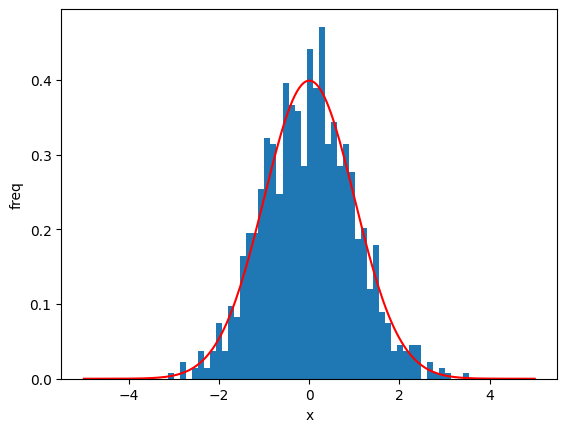

In [11]:
x_sample = myrandn(1000)
x = np.linspace(-5,5,200)
y = (1/np.sqrt(2*np.pi)) * np.exp(-(1/2)*x*x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(x_sample, bins=50, density=True)
ax.plot(x,y,'r-')
ax.set_xlabel('x')
ax.set_ylabel('freq')

<!-- 線形回帰モデルにおける誤差 -->

## 多変量ガウス分布

### パラメータの定義

In [12]:
cov1 = np.array([[1.0, 0.9], [0.9, 1]])
cov2 = np.array([[1.0, -0.7], [-0.7, 1]])

### 多変量ガウス分布の確率密度関数

In [13]:
def gauss_multiple(x, cov=np.array([[1,0],[0,1]]), mu=np.array([[0],[0]])) -> np.array:
    D = x.shape[0]
    N = x.shape[1]
    x = x - mu # 中心化
    coef = 1/(np.sqrt(2*np.pi)**D * np.sqrt(np.linalg.det(cov)))
    y = np.array([np.exp(-(x[:,i].T @ (np.linalg.inv(cov) @ x[:,i]))/2) for i in range(N)]) * coef
    return y

In [18]:
def plot_3d(cov=np.array([[1,0],[0,1]]), mu=np.array([[0],[0]])):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 51),
                        np.linspace(-3, 3, 51))
    zz = [[gauss_multiple(np.array([[xx[i][j]], [yy[i][j]]]), cov=cov, mu=mu)[0] for j in range(len(xx[i]))] for i in range(len(xx))]
    surface = go.Surface(
        x=xx,
        y=yy,
        z=zz,
        # opacity=0.5,
        colorscale=[[0, 'blue'], [1, 'red']],
        # showscale=False
    )
    layout = go.Layout(
        scene=dict(
            xaxis_title='x1',
            yaxis_title='x2',
            zaxis_title='y'
        ),
    )
    fig = go.Figure(data=[surface], layout=layout)
    fig.show()

In [19]:
plot_3d()

In [20]:
plot_3d(cov=cov1)

In [21]:
plot_3d(cov=cov2)

2変量ガウス分布からのサンプリング

In [22]:
N = 200
x_sample = np.random.normal(size=(2,N))

L1 = np.linalg.cholesky(cov1)
L2 = np.linalg.cholesky(cov2)

x_sample1 = L1 @ x_sample
x_sample2 = L2 @ x_sample

[]

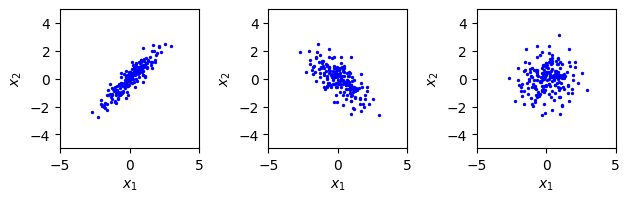

In [23]:
x_samples = [x_sample1, x_sample2, x_sample]

fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(x_samples[i][0,:], x_samples[i][1,:], color='blue', s=2)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_aspect('equal')
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])

fig.tight_layout()
plt.plot()